Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Marcel Kämpchen, Tim Nogga, Jan Höchst, Amelie Artmann, Kolja von der Twer"
COLLABORATORS = ""

---

# Übungen (Vorlesung 04)
## Das relationale Datenmodell

1. Nennen Sie alle Bestandteile des relationalen Datenmodells (3 Punkte)

- Relation (Tabelle), besteht aus >= 0 Tupeln
- Tupel, Zeile in einer Tabelle
- Attribut, Beschriftung einer Spalte
- Attributwert, Wert eines einzelnen Feldes

2. Unten ist die Tabelle der Relation COURSE gegeben. 
    Geben Sie jeweils ein Beispiel eines 1) Attributs und eines 2) Tupels auf diese Relation bezogen an. (4 Punkte)

<!-- 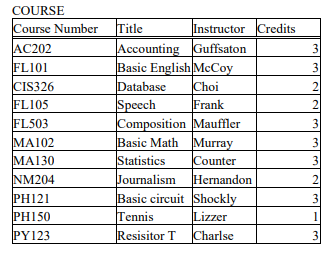 -->

<div>
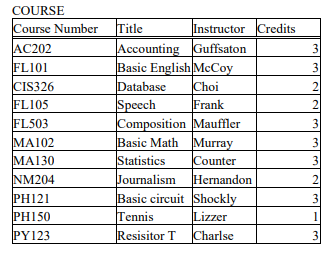
</div>


1) Course Number
2) (AC202, Accounting, Guffsaton, 3)

3. Welche der folgenden Attribute ist am besten geeignet, um als Primärschlüssel in einer Kundendatenbank mit mehr als 100,000 Einträgen benutzt zu werden? Geben Sie für alle anderen Möglichkeiten zusätzlich an, warum diese als Primärschlüssel ungeeignet sind. (3 Punkte)

    a. Name
    
    b. Addresse
    
    c. Eine (neue) Customer-ID
    
    d. Geburtsdatum

Antwort c würde sich am Besten als Primärschlüssel eignen, da eine solche Customer-ID eindeutig für jeden Kunden sein kann. Alle anderen Attribute (Name, Addresse, Geburtsdatum) sind nicht eindeutig und können bei mehr als einem Kunden vorkommen.

4. Begründen Sie für jede der folgenden Aussagen, ob und warum diese wahr oder falsch ist (Für jede richtige Antwort 1 Punkt)

    a. Der Primärschlüssel eines Tupels kann leer sein.
    b. Nicht-Schlüsselattribute dürfen immer leer sein.
    c. Der Fremdschlüssel eines Tupels darf NULL sein.
    d. Zwei Tupel in der Datenbank können denselben Fremdschlüssel besitzen
    

a) Falsch, da der Primärschlüssel einzelne Tupel identifizert und dies ist bei NULL nicht möglich
b) Falsch, auch andere Attribute können eingeschränkt werden
c) Wahr
d) Wahr, mehrere Tupel dürfen denselben Tupel in einer anderen Relation referenzieren

5. Unten finden Sie ein Datenbankschema eines Unternehmens, zusammen mit den Beziehungen zwischen den Relationen. Geben Sie Primär- und Fremdschlüssel der Relation "Angstellter" an (4 Punkte)

<div>
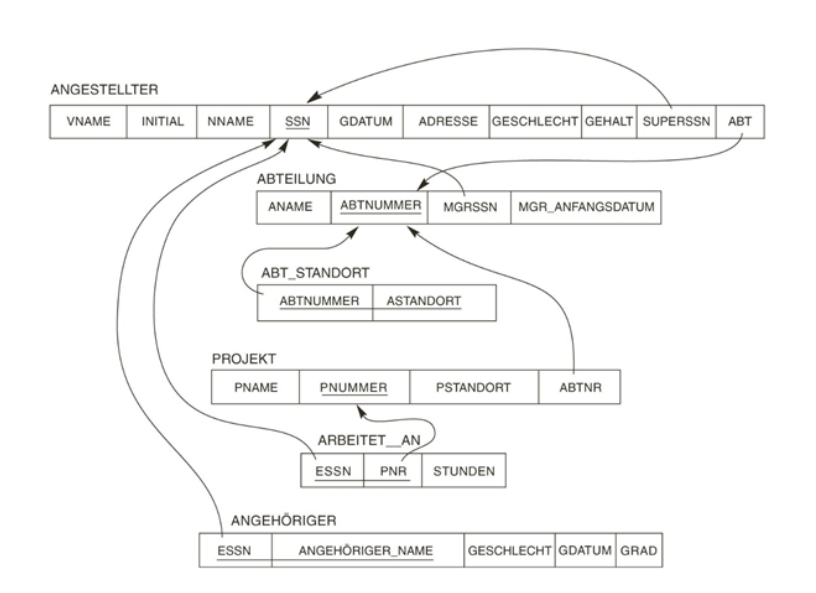
</div>

Primärschlüssel ist SSN, Fremdschlüssel sind SUPERSSN und ABT

## Relationale Algebra

6. Wir betrachten wieder das Datenbankschema aus Aufgabe 5.  Mittels relationaler Algebra ist nun folgende Anfrage gegeben:


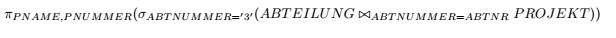

Erläutern Sie das Ergebnis der Anfrage und gehen Sie dabei auf die Attribute der Relation ein, die man als Ergebnis erhält (3 Punkte)

Die Anfrage liefert alle Projekte der Abteilung mit der Abteilungsnummer 3 (2 Punkte). Die zurückgegebene Relation hat die Attribute PNAME und PNUMMER (1P)

7. Ausgehend von den in der unteren Abbildung gegebenen Relationen,

1) durch welche einfache Operation kann "Group 2" aus "Group1" und "Students" erhalten werden?

2) durch welche einfache Operation kann "Students" aus "Group1" und "Group 2" erhalten werden?

* Hinweis: Möglich sind Vereinigung (union, ∪), Differenz (difference, —, \), Selektion (selection, σ), Projektion (projection, π) und Kartesisches Produkt (cross product × )

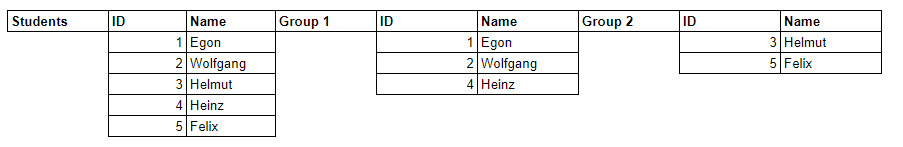

1) Differenz zwischen Students und Group 1: Students - Group1
2) Vereinigung von Students und Group 1: Students ∪ Group1

8. Was ist das Kartesische Produkt (Cartesian product, cross product, × ) der folgendenden beiden Relationen? (3 Punkte)

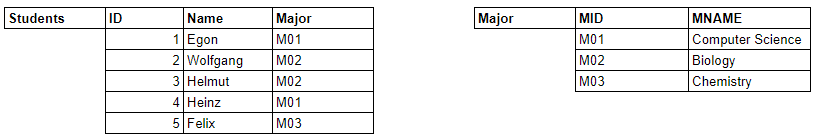

Eine Relation mit den Attributen ID, Name, Major, MID und MNAME, wobei die Zeilen alle möglichen Kombinationen der Tupel aus Students und Major sind

# Übungen (Vorlesung 05)

### Geben Sie die SQL Statements an, um die Tabellen mit den gegebenen Bedingungen zu erstellen.

 - Schreiben Sie Ihren Code bitte direkt unter "# YOUR CODE HERE" und entfernen Sie, sofern Sie die Aufgabe gelöst haben die Zeile "raise NotImplementedError()"
 
 - Schreiben Sie die SQL Query bitte in die Zeilen zwischen den Triple-Anführungsstrichten:
     
     c.execute("""
         SQL Query
     """)
     
 Orientieren Sie sich am folgenden Beispiel:

#### Erstellen der Datenbank und der Tabellen

* Sollten Sie beim wiederholten Ausführen einer Zelle auf Fehler stoßen, wie zum Beispiel "table already exists", also dass die Tabelle bereits existiert, dann lassen Sie die folgende Zelle erneut laufen, um die Datenbank erneut zu initialisieren (Sie müssen die alte Datebank nicht explizit schließen, das geschieht durch die erneute Initialisierung implizit. Sollte Sie dies jedoch manuell machen wollen nutzen Sie bitte "conn.close()").

In [62]:
import sqlite3
# create in-memory databases
conn = sqlite3.connect(':memory:')
c = conn.cursor()

# Erstellen der Tabelle STUDENT, mit Attributen: Studentennummer SNO (nicht NULL), Vorname SFIRST and Nachname SLAST (String mit max. 20 Zeichen)
# Geburtstag SBIRTHDAY mit Typ DATETIME, und Hauptfach SMAJOR (String mit max. 20 Zeichen)

# YOUR CODE HERE
c.execute("""
            CREATE TABLE STUDENT (
            SNO VARCHAR(3) NOT NULL,
            SFIRST VARCHAR(20) NOT NULL,
            SLAST VARCHAR(20) NOT NULL,
            SBIRTHDAY TIMESTAMP,
            SMAJOR VARCHAR(20),
            PRIMARY KEY (SNO)
            )""")

# Erstellen der Tabelle COURSE, mit Attributen: Kursnummer CNO (nicht null), Kursname CNAME, Dozierenden ID TNO (Fremdschlüssel)
c.execute("""
        CREATE TABLE COURSE (
        CNO VARCHAR(5) NOT NULL,
        CNAME VARCHAR(50) NOT NULL,
        TNO VARCHAR(10) NOT NULL,
        PRIMARY KEY (CNO),
        FOREIGN KEY (TNO) REFERENCES TEACHER
        )""")

# Erstellen der Tabelle TEACHER, mit Attributen: Dozierenden ID TNO, Vorname TFIRST, Nachname TLAST, der Bereich in dem der/die Dozierende arbeitet DEPARTMENT
c.execute("""
        CREATE TABLE TEACHER (
        TNO VARCHAR(3) NOT NULL,
        TFIRST VARCHAR(20) NOT NULL,
        TLAST VARCHAR(20) NOT NULL,
        DEPARTMENT VARCHAR(30) NOT NULL
        )""")

***1. Erstellen Sie eine Tabelle mit Namen SCORE und den nachfolgenden Attributen: (5 Punkte)***
 - Studierendennummer SNO, Typ String mit maximaler Länge von 3
 - Kursnummer CNO, Typ String mit maximaler Länge von 5
 - Note einer/-s Studierenden in einem Kurs, Typ Numerisch mit Beschränkung numeric(10,1)
 - Kein Attribut erlaubt einen NULL Wert
 
 * Schreiben Sie Ihren Code direkt unter die Zeile mit "# YOUR CODE HERE" und entfernen Sie nach Bearbeitung der Aufgabe die Zeile "raise NotImplementedError()"
 
 * Schreiben Sie die SQL Query bitte in die Zeilen zwischen den Triple-Anführungsstrichten (wie als Art Parameter einer Funktion):
     
        c.execute(""" 
         SQL Query
         """)

In [63]:
# YOUR CODE HERE
c.execute("""
    CREATE TABLE SCORE (
    SNO VARCHAR(3) NOT NULL,
    CNO VARCHAR(5) NOT NULL,
    GRADE NUMERIC(10,1) NOT NULL
    )""")

#### Einfügen von Daten in die Tabellen

In [64]:
# Einfügen von Daten in die Tabellen

# Studierende
c.execute("""INSERT INTO STUDENT VALUES 
            ('001', 'Egon', 'Huber', '2001-08-01', 'Computer Science'),
            ('002', 'Wolfgang',' Maier', '2002-02-25', 'Cyber Security'),
            ('003', 'Peter', 'Schmidt', '1999-12-31', 'Mathematics'),
            ('004', 'Christian', 'Neumann', '2001-04-15', 'Computer Science')
         """)
# Kurse
c.execute("""INSERT INTO COURSE VALUES 
            ('3-105','Data Science','804'),
            ('3-245','Information Retrieval','805'),
            ('6-166','Linear Algebra','601'),
            ('9-888','Introduction to Social Psychology','905')
         """)
# Punktzahlen
c.execute("""INSERT INTO SCORE VALUES 
            ('001','3-245',86),
            ('002','3-245',75),
            ('003','3-245',68),
            ('001','3-105',92),
            ('002','3-105',88),
            ('003','3-105',76),
            ('004','6-166',85),
            ('003','9-888',92)
         """)

***2. Fügen Sie bitte folgende Daten in die TEACHER Tabelle (5 points)***

| TNO	| TFIRST |	TLAST |	DEPARTMENT |
| --- | --- | --- | --- |
| 804	| Julia	| Schmidt| 	Computer Science| 
| 805	| Stefan| 	Meyer| 	Computer Science| 
| 601	| Anna| 	Weber| 	Mathematics| 
| 905	| Michael| 	Wagner| 	Social Sciences| 

In [65]:
# insert teachers' information
# YOUR CODE HERE
c.execute("""
    INSERT INTO TEACHER VALUES
    ('804', 'Julia', 'Schmidt', 'Computer Science'),
    ('805', 'Stefan', 'Meyer', 'Computer Science'),
    ('601', 'Anna', 'Weber', 'Mathematics'),
    ('905', 'Michael', 'Wagner', 'Social Sciences')
    """)

In [66]:
def test_score(c):
    c.execute("SELECT * FROM SCORE")
    return c.fetchall()

assert test_score(c) == [('001', '3-245', 86),('002', '3-245', 75),('003', '3-245', 68), ('001', '3-105', 92),('002', '3-105', 88), ('003', '3-105', 76), ('004', '6-166', 85), ('003', '9-888', 92)]

In [67]:
def test_teacher(c):
    c.execute("SELECT * FROM TEACHER")
    return c.fetchall()
assert test_teacher(c) == [('804', 'Julia', 'Schmidt', 'Computer Science'),('805', 'Stefan', 'Meyer', 'Computer Science'),('601', 'Anna', 'Weber', 'Mathematics'), ('905', 'Michael', 'Wagner', 'Social Sciences')]

# Übungen (Vorlesung 06)

## Bitte vervollständigen Sie die Funktionen, um Datenbankabfragen an die in den vorigen Aufgaben erstellte Datenbank ausführen zu können

 - Schreiben Sie Ihren Code bitte direkt unter "# YOUR CODE HERE" und entfernen Sie Sie, sofern Sie die Aufgabe gelöst haben die Zeile "raise NotImplementedError()"
 
 - Schreiben Sie die SQL Query bitte in die Zeilen zwischen den Triple-Anführungsstrichten:
     
     c.execute("""
         SQL Query
     """)
     
 Orientieren Sie sich am folgenden Beispiel:

***1. Auflisten aller Vor- und Nachnamen der Studierenden***

In [29]:
# alle Vor- und Nachnamen der Studierenden
def task1(c):
    c.execute(""" 
                SELECT SFIRST,SLAST FROM STUDENT
            """)
    return c.fetchall()

In [30]:
assert task1(c) == [('Egon', 'Huber'), ('Wolfgang', ' Maier'), ('Peter', 'Schmidt'),('Christian', 'Neumann')]

***2. Finden Sie die Namen aller unterschiedlichen Bereiche in denen Dozierende arbeiten. (2 Punkte)***

In [31]:
def task2(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT DISTINCT DEPARTMENT FROM TEACHER
        """)
    return c.fetchall()

In [32]:
assert task2(c) == [('Computer Science',), ('Mathematics',), ('Social Sciences',)]

***3. Finden Sie alle Einträge in der SCORE Tabelle, bei denen die Punktzahl zwsichen 60 und 80 liegt. (3 Punkte)***

In [33]:
def task3(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT * FROM SCORE WHERE GRADE>60 AND GRADE<80
        """)
    return c.fetchall()

In [34]:
assert task3(c) == [('002', '3-245', 75), ('003', '3-245', 68), ('003', '3-105', 76)]

***4. Finden Sie alle Einträge in der SCORE Tabelle, bei denen die Punktzahl 68, 85 oder 92 beträgt. (3 Punkte)***

In [35]:
def task4(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT * FROM SCORE WHERE GRADE=68 OR GRADE=85 OR GRADE=92
        """)
    return c.fetchall()

In [36]:
assert task4(c) == [('003', '3-245', 68),('001', '3-105', 92),('004', '6-166', 85), ('003', '9-888', 92)]

### ***5. Finden Sie alle Einträge für Kurs 3-105 in der SCORE Tabelle und erstellen Sie eine Liste in absteigender Reihenfolge basierend auf den Punktzahlen. (3 Punkte)***

In [37]:
def task5(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT * FROM SCORE WHERE CNO='3-105' ORDER BY GRADE DESC
        """)
    return c.fetchall()

In [38]:
assert task5(c) == [('001', '3-105', 92), ('002', '3-105', 88), ('003', '3-105', 76)]

***6. Bestimmen Sie die durschnittliche Punktzahl für Kurs 3-245. (3 Punkte)***

In [39]:
def task6(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT avg(GRADE) FROM SCORE WHERE CNO='3-245'
        """)
    return c.fetchall()

In [40]:
assert task6(c) == [(76.33333333333333,)]

***7. Finden Sie die SCORE-Einträge aller Kurse, welche von Dozierenden des Bereichs "Computer Science" gelehrt werden. (5 Punkte)***

In [46]:
def task7(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT SCORE.SNO, SCORE.CNO, SCORE.GRADE
        FROM ((SCORE
        INNER JOIN COURSE ON SCORE.CNO=COURSE.CNO)
        INNER JOIN TEACHER ON COURSE.TNO=TEACHER.TNO)
        WHERE TEACHER.DEPARTMENT='Computer Science'
        """)
    return c.fetchall()

In [47]:
assert task7(c) == [('001', '3-245', 86), ('002', '3-245', 75), ('003', '3-245', 68), ('001', '3-105', 92), ('002', '3-105', 88),('003', '3-105', 76)]

***8. Finden Sie den Vor- und Nachnamen der Studenten, welche eine üerdurchschnittliche Punktzahl in Kurs '3-105' erreicht haben. (5 Punkte)***

In [59]:
def task8(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT STUDENT.SFIRST, STUDENT.SLAST
        FROM STUDENT
        INNER JOIN SCORE ON STUDENT.SNO=SCORE.SNO
        WHERE CNO='3-105' AND SCORE.GRADE>(SELECT avg(GRADE) FROM SCORE)
        """)
    return c.fetchall()

In [60]:
assert task8(c) == [('Egon', 'Huber'), ('Wolfgang', ' Maier')]

***9. Übersetzen Sie dieses Mal aus der RA in SQL. (4 Punkte)***

$\sigma_{CNO='3-105'}(SCORE) \cup \sigma_{GRADE>90}(SCORE)$

In [76]:
def task9(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT * FROM SCORE WHERE CNO='3-105'
        UNION
        SELECT * FROM SCORE WHERE GRADE>90
        """)
    return c.fetchall()

In [77]:
assert task9(c) == [('001', '3-105', 92),('002', '3-105', 88), ('003', '3-105', 76), ('003', '9-888', 92)]

***10. Übersetzen Sie dieses Mal aus der RA in SQL. (3 Punkte)***

$\pi_{TFIRST,TLAST}(\sigma_{TEACHER.TNO=COURSE.TNO}(TEACHER x COURSE))$

In [84]:
def task10(c):
    # YOUR CODE HERE
    c.execute("""
        SELECT TEACHER.TFIRST, TEACHER.TLAST
        FROM TEACHER
        INNER JOIN COURSE ON TEACHER.TNO=COURSE.TNO
        """)
    return c.fetchall()

In [85]:
assert task10(c) == [('Julia', 'Schmidt'),('Stefan', 'Meyer'),('Anna', 'Weber'), ('Michael', 'Wagner')]